In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


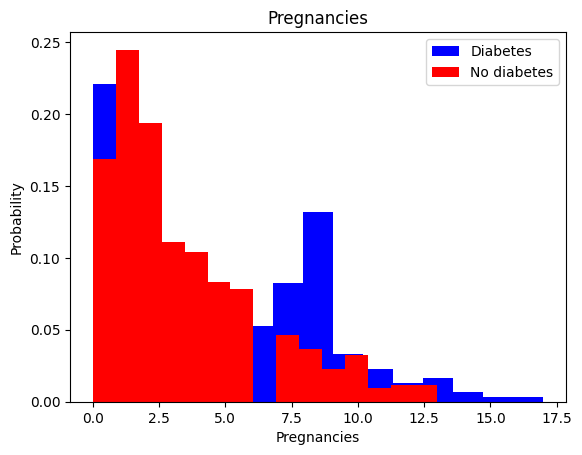

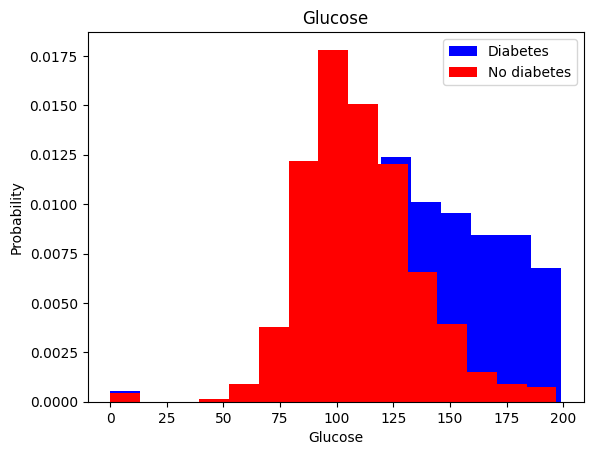

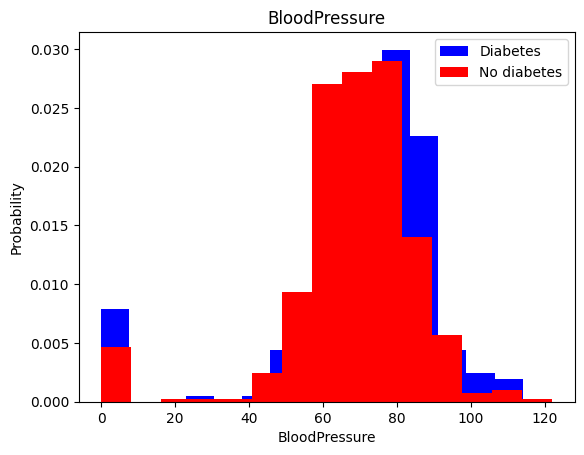

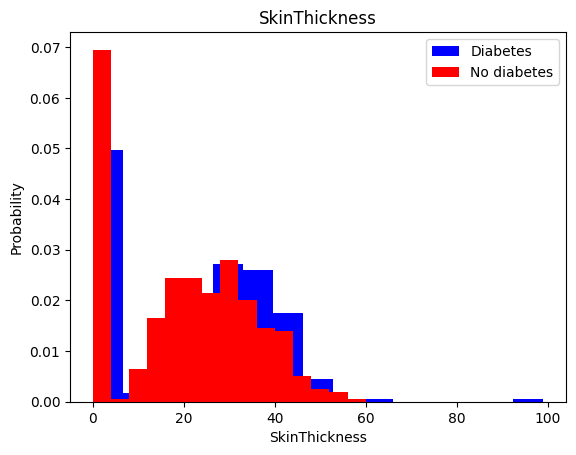

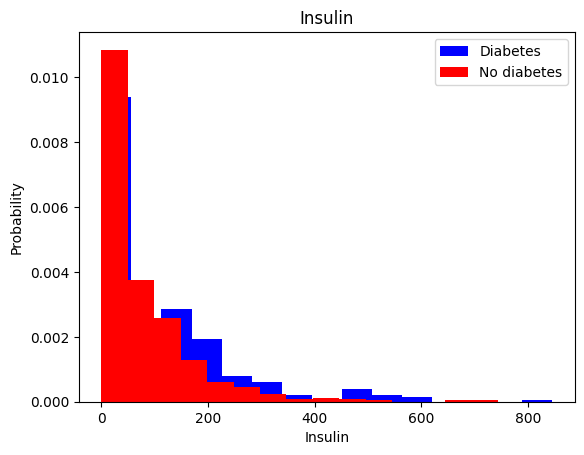

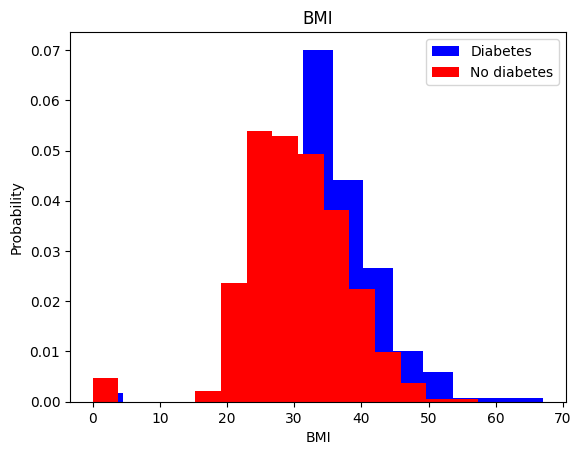

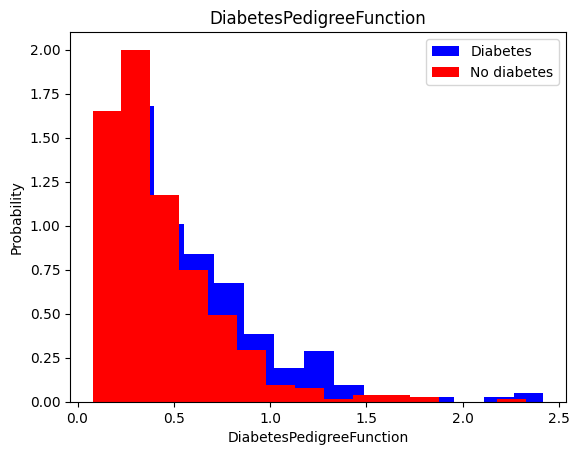

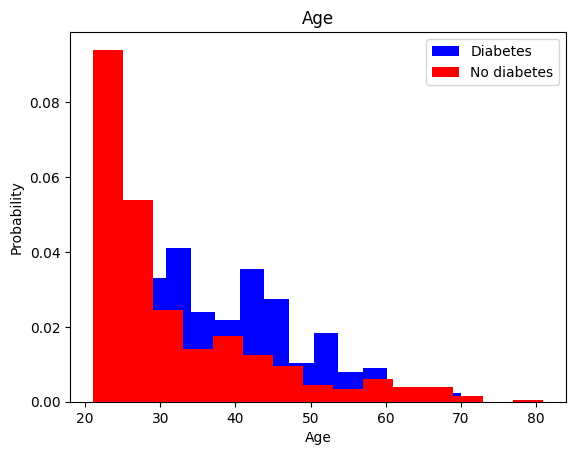

In [5]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color = 'blue', label='Diabetes', density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color = 'red', label='No diabetes', density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [21]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)
# fits the sampler to the data and then applies the random oversampling to balance the class distribution by replicating samples from the minority
# class until it matches the number of samples in the majority class.

In [22]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [24]:
model = tf.keras.Sequential([
                         tf.keras.layers.Dense(16, activation='relu'), # 16 neurons
                         tf.keras.layers.Dense(16, activation='relu'),
                         tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid give probabilities in the range of 0 and 1
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam is the most common optimizer and is used for optimizing weights
              # during training
              loss=tf.keras.losses.BinaryCrossentropy(), # BinaryCrossentropy loss function is commonly used for binary classification tasks
              metrics=['accuracy'])

In [26]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5833


[0.6821605563163757, 0.5833333134651184]

In [27]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5700


[0.6882305145263672, 0.5699999928474426]

In [28]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))
# batch_size is the no. of samples, in this case women

Epoch 1/20
38/38 [==============================] - 2s 18ms/step - loss: 0.6641 - accuracy: 0.6267 - val_loss: 0.6469 - val_accuracy: 0.7050
Epoch 2/20
38/38 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.7000 - val_loss: 0.6083 - val_accuracy: 0.7300
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.5951 - accuracy: 0.7117 - val_loss: 0.5709 - val_accuracy: 0.7350
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5657 - accuracy: 0.7250 - val_loss: 0.5379 - val_accuracy: 0.7600
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.7283 - val_loss: 0.5123 - val_accuracy: 0.7650
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5248 - accuracy: 0.7367 - val_loss: 0.4915 - val_accuracy: 0.7700
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7433 - val_loss: 0.4847 - val_accuracy: 0.7850
Epoch 8/20
38/38 [=

In [29]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8000


[0.4648694097995758, 0.800000011920929]